# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [ ]:
# Instalando biblioteca com módulos de visualização
!pip install util-gfsilveira

In [ ]:
# Instalando biblioteca com módulos de visualização das árvores
!pip install dtreeviz

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from util import printLis

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

import dtreeviz

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [ ]:
# Instanciando a lista de colunas da base
colunas = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "MEDV",
]

In [ ]:
# Importando a base de dados
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(
                      data_url,
                      sep="\s+",
                      skiprows=22,
                      header=None
                    )

X = pd.DataFrame(
                  np.hstack([boston.values[::2, :], boston.values[1::2, :2]]),
                  columns=colunas[:-1]
                )
y = pd.DataFrame(
                  boston.values[1::2, 2],
                  columns=[colunas[-1]]
                )

print("Explicativas")
display(X.head())

print("\nDependente")
display(y.head())

Explicativas


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33



Dependente


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2




---



# 1 Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [ ]:
# Removendo possíveis NaN do banco
X = X.dropna()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
# Modificando as classes dos dados para int
X = X.astype({
    "CHAS": "int64",
    "RAD": "int64",
})
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


In [ ]:
# Verificando os dados
X.CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [ ]:
# Verificando os dados
X.RAD.value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

In [ ]:
# Verificando os dados
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33




---



# 2  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [ ]:
# Instanciando uma DataFrame com todo o conjunto de dados
df_copy = X.copy()
df_copy['MEDV'] = y
df_copy.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Calculando as correlações entre as variáveis
df_copy_corr = df_copy.corr()
df_copy_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


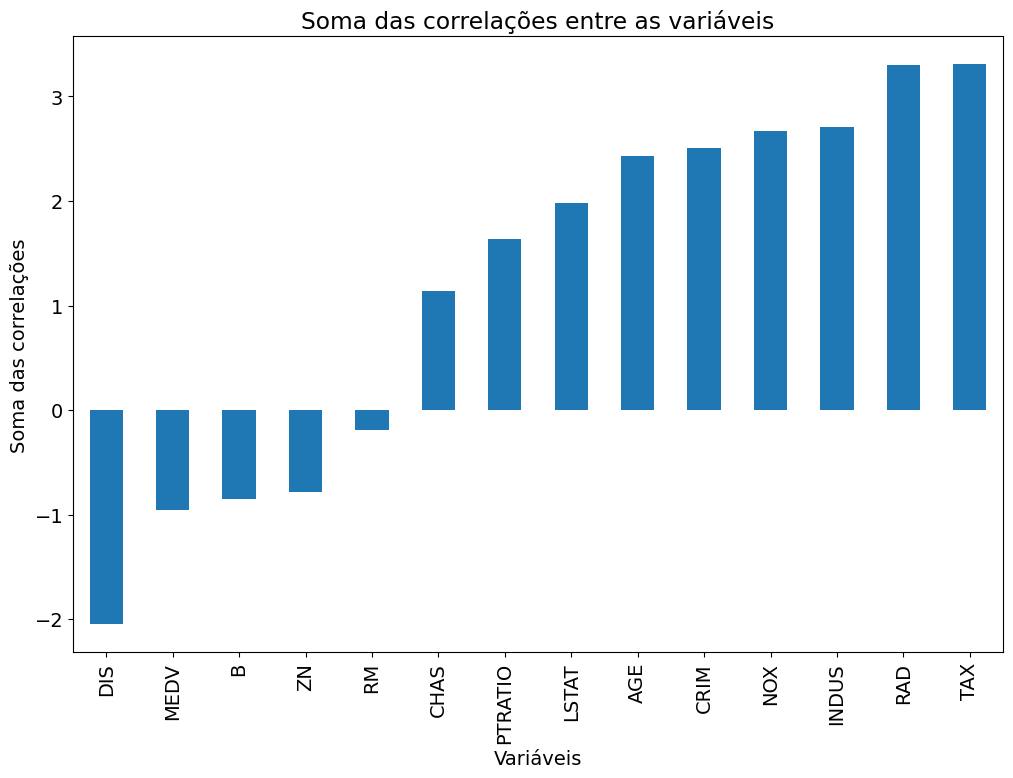

In [ ]:
# Plotando a soma das correlações
plt.title("Soma das correlações entre as variáveis")
df_copy_corr.sum().sort_values().plot.bar()
plt.xlabel("Variáveis")
plt.ylabel("Soma das correlações")
plt.show()

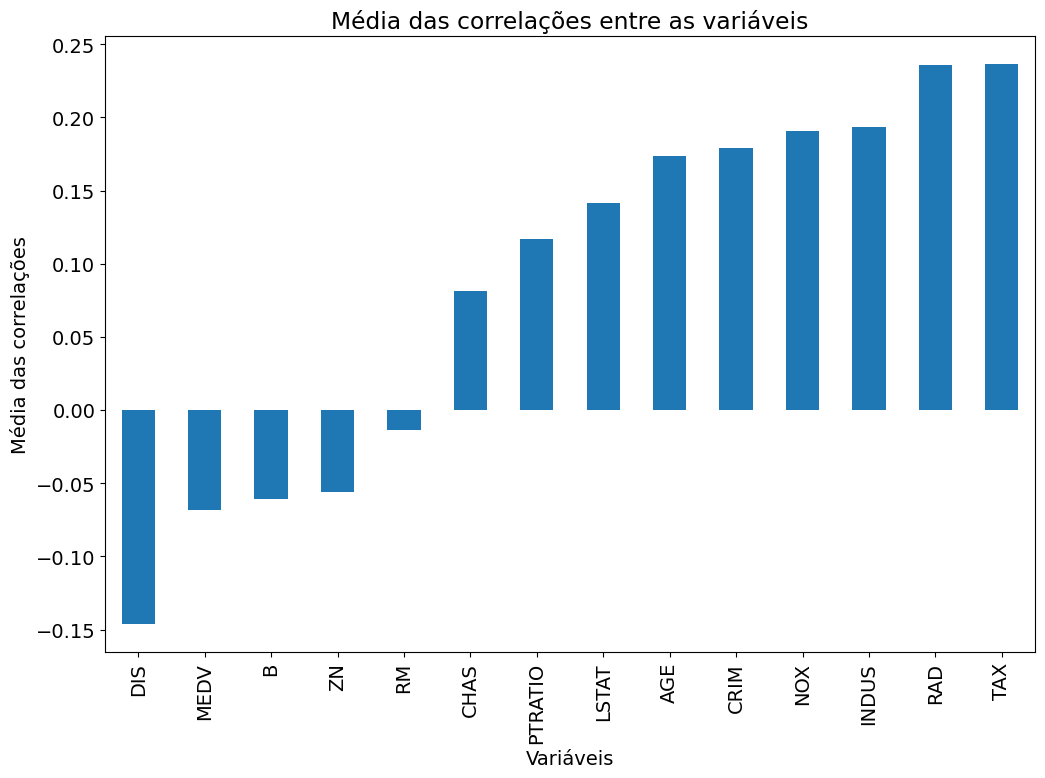

In [ ]:
# Plotando a soma das correlações
plt.title("Média das correlações entre as variáveis")
df_copy_corr.mean().sort_values().plot.bar()
plt.xlabel("Variáveis")
plt.ylabel("Média das correlações")
plt.show()

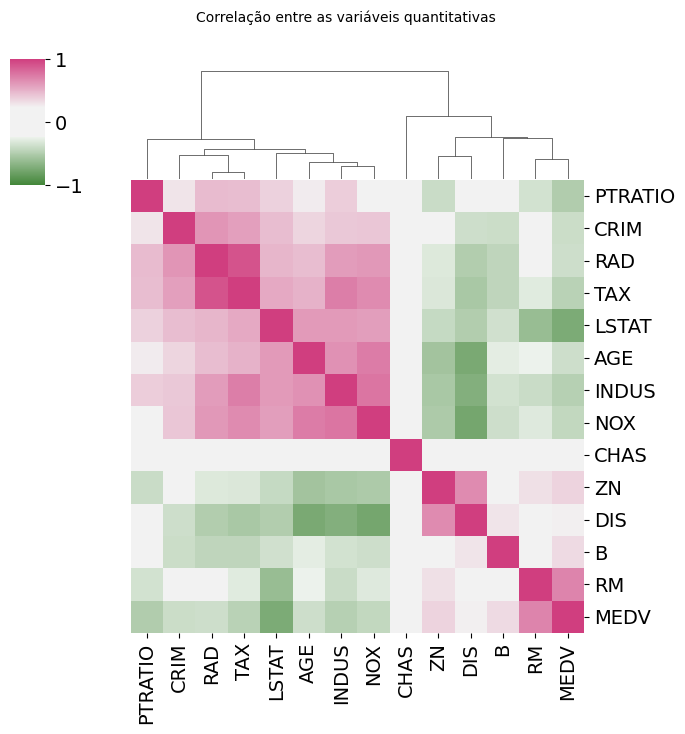

In [ ]:
# Plotando as correlações
# Obtendo a mascara de valores superiores a diagonal principal
cmap = sns.diverging_palette(
    h_neg=125,
    h_pos=350,
    as_cmap=True,
    sep=60,
    center="light"
)

g = sns.clustermap(
    data=df_copy_corr,
    figsize=(7,7),
    center=0,
    cmap=cmap,
    vmin=-1,
    vmax=1
)
g.ax_row_dendrogram.set_visible(False)
g.fig.suptitle("Correlação entre as variáveis quantitativas", y=1.05, size=10)

plt.show()

In [ ]:
# Selecionando as variáveis com menor e maior correlação com a variável dependente
prim, segun, terc = df_copy_corr['MEDV'].sort_values()[[-1, -2, 0]].index
print(prim, segun, terc)

MEDV RM LSTAT


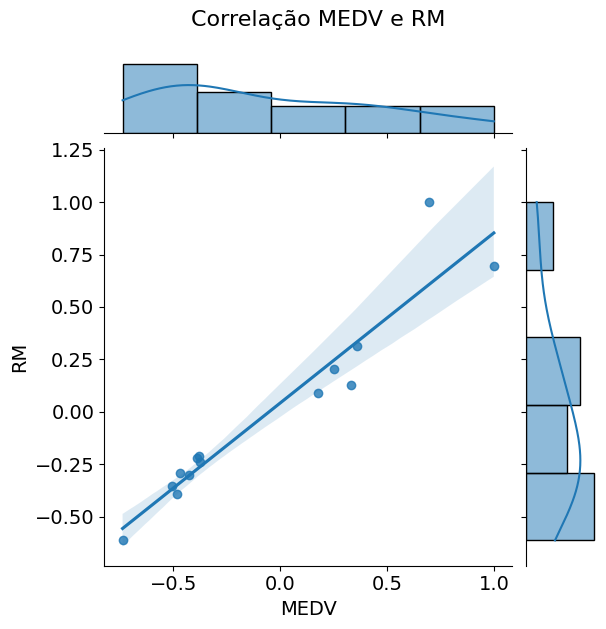

In [ ]:
# Plotando a relação entre a variável dependente e a com maior correlação
f = sns.jointplot(
    x=prim,
    y=segun,
    kind="reg",
    data=df_copy_corr,
)

title = f"Correlação {prim} e {segun}"
plt.suptitle(title, y=1.05, size=16)
plt.show()

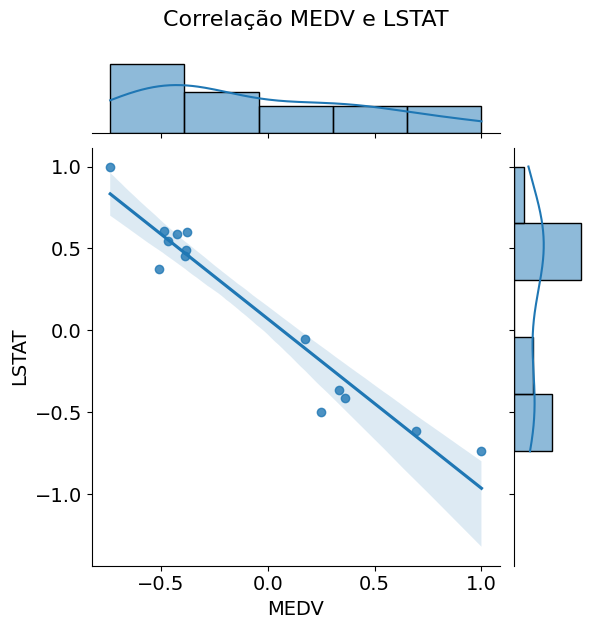

In [ ]:
# Plotando a relação entre a variável dependente e a com segunda maior correlação
f = sns.jointplot(
    x=prim,
    y=terc,
    kind="reg",
    data=df_copy_corr,
)

# f.ax_joint.set_xlabel('Distâncias Ponderadas até Centros de Empregos')
# f.ax_joint.set_ylabel('Taxa de Imposto')

title = f"Correlação {prim} e {terc}"
plt.suptitle(title, y=1.05, size=16)
plt.show()

## Conclusão

Pela observação das correlações, a variável com a maior correlação é o número médio de quartos por habitação (**RM**) e a com a menor é a porcentagem do status inferior da população (**LSTAT**). Essas seriam as duas variáveis com maior poder preditivo.



---



# 3 Separe os dados em validação e teste

In [ ]:
# Separando em teste e treino
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)
print(
    x_train.shape,
    x_test.shape,
    y_train.shape,
    y_test.shape,
)

(354, 13) (152, 13) (354, 1) (152, 1)




---



# 4 Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [ ]:
# Instanciando os objetos com os algoritmos de árvores
arvore_2 = DecisionTreeRegressor(max_depth=2)
arvore_8 = DecisionTreeRegressor(max_depth=8)

# Treinando os algoritmos
arvore_2.fit(x_train, y_train)
arvore_8.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8)



---



# 5 Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [ ]:
# Verificando as métricas treino
mse2 = arvore_2.score(x_train, y_train)
mse8 = arvore_8.score(x_train, y_train)

template = "O R² da árvore com profundidade {0} é: {1:.2f}"

print("Treinamento")
print(template.format(arvore_2.get_depth(), mse2).replace(".",","))
print(template.format(arvore_8.get_depth(), mse8).replace(".",","))

Treinamento
O R² da árvore com profundidade 2 é: 0,73
O R² da árvore com profundidade 8 é: 0,97


In [ ]:
# Verificando as métricas de teste
mse2 = arvore_2.score(x_test, y_test)
mse8 = arvore_8.score(x_test, y_test)

template = "O R² da árvore com profundidade {0} é: {1:.2f}"

print("Teste")
print(template.format(arvore_2.get_depth(), mse2).replace(".",","))
print(template.format(arvore_8.get_depth(), mse8).replace(".",","))

Teste
O R² da árvore com profundidade 2 é: 0,52
O R² da árvore com profundidade 8 é: 0,79




---



# 6 Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore com profundidade máxima 8, que obteve melhores métricas no conjunto de teste.



---



# 7 Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

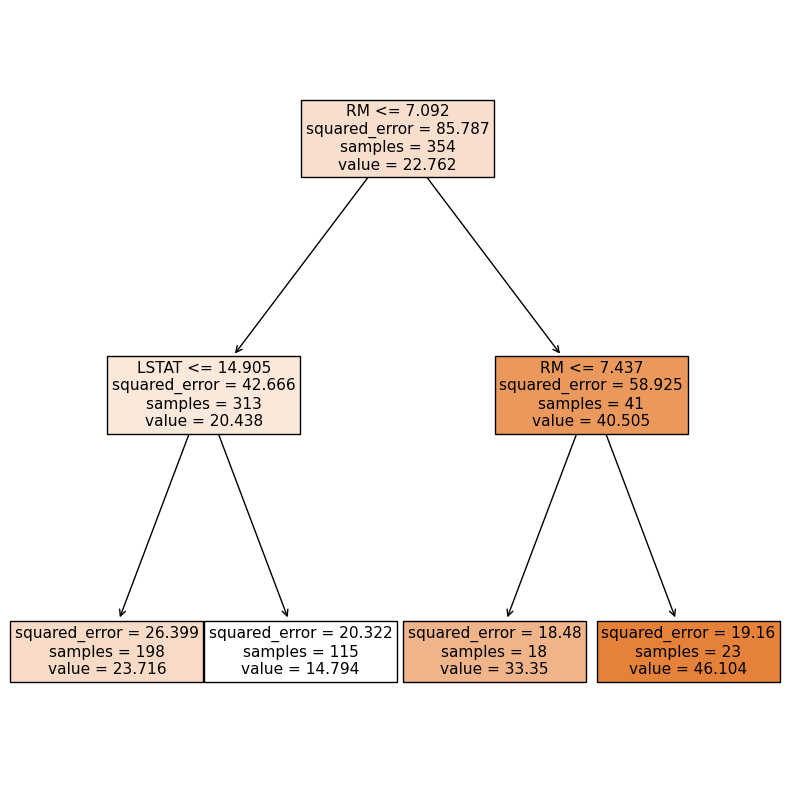

In [ ]:
# Plote da árvore com profundidade 2
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(
    arvore_2,
    feature_names=X.columns,
    filled=True
)

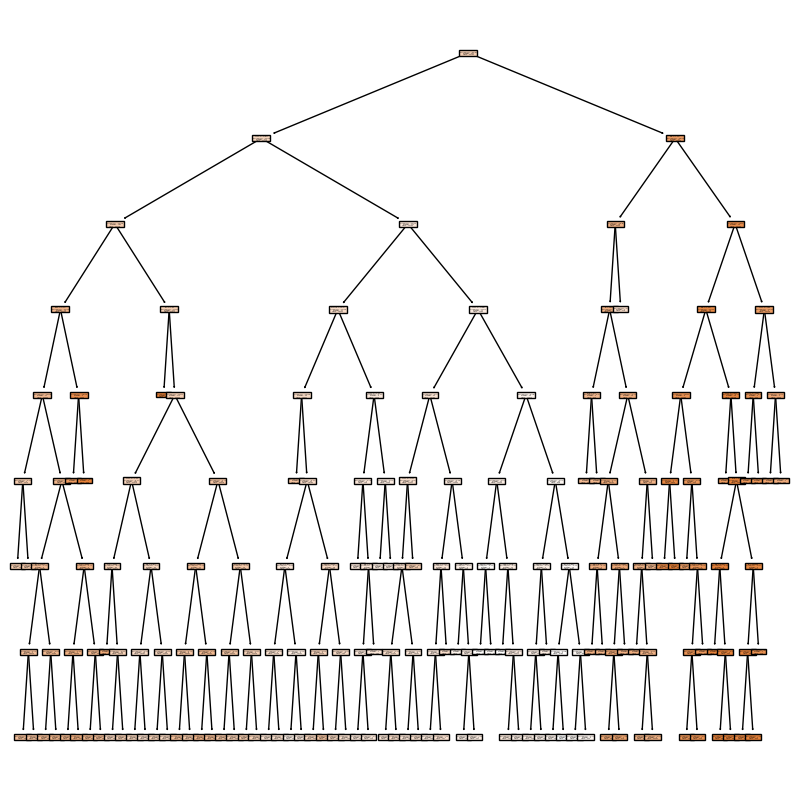

In [ ]:
# Plote da árvore com profundidade 8
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(
    arvore_8,
    feature_names=X.columns,
    filled=True
)

In [ ]:
# Verificando as colunas
printLis(X.columns)

-------------
-=< Lista >=-
-------------
0 -> CRIM
1 -> ZN
2 -> INDUS
3 -> CHAS
4 -> NOX
5 -> RM
6 -> AGE
7 -> DIS
8 -> RAD
9 -> TAX
10 -> PTRATIO
11 -> B
12 -> LSTAT


In [ ]:
# Verificando a árvore com maior profundidade
representacao_textual = tree.export_text(arvore_8)
print(representacao_textual)

|--- feature_5 <= 7.09
|   |--- feature_12 <= 14.91
|   |   |--- feature_12 <= 4.91
|   |   |   |--- feature_4 <= 0.54
|   |   |   |   |--- feature_5 <= 6.52
|   |   |   |   |   |--- feature_7 <= 7.00
|   |   |   |   |   |   |--- value: [23.50]
|   |   |   |   |   |--- feature_7 >  7.00
|   |   |   |   |   |   |--- value: [24.80]
|   |   |   |   |--- feature_5 >  6.52
|   |   |   |   |   |--- feature_4 <= 0.42
|   |   |   |   |   |   |--- feature_7 <= 8.08
|   |   |   |   |   |   |   |--- feature_6 <= 21.10
|   |   |   |   |   |   |   |   |--- value: [29.05]
|   |   |   |   |   |   |   |--- feature_6 >  21.10
|   |   |   |   |   |   |   |   |--- value: [28.20]
|   |   |   |   |   |   |--- feature_7 >  8.08
|   |   |   |   |   |   |   |--- feature_11 <= 388.68
|   |   |   |   |   |   |   |   |--- value: [30.10]
|   |   |   |   |   |   |   |--- feature_11 >  388.68
|   |   |   |   |   |   |   |   |--- value: [31.60]
|   |   |   |   |   |--- feature_4 >  0.42
|   |   |   |   |   |   |--- 

In [ ]:
# Salvando a árvore mais profunda
viz_model = dtreeviz.model(
    arvore_8,
    X_train=X,
    y_train=y.values,
    feature_names=X.columns,
    target_name='MEDV',
    class_names="Target"
)

viz_model.view().save("arvore_8.svg")

## Conclusão

Pela observação das folhas da árvore, a primeira variável é o número médio de quartos por habitação (**RM**). Porcentagem do status inferior da população (**LSTAT**) seria a segunda variável presente nas árvores.
<br>
É interessante observar que essas são variáveis com correlção intermediária em relação as demais informações do banco.



---

